In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3*X + np.random.randn(100, 1)

- numpy.random.rand() : 0에서 1 사이의 값으로 uniform distribution에 따라 random 값을 함수 인자의 shape(dimension)으로 생성이 됩니다.
- numpy.random.randn() : Gaussian distribution (mean 0 and variance 1)에 따라 random 값을 함수 인자의 shape(dimension)으로 생성이 됩니다.

X는 0~2 사이의 랜덤 값이고 y는 4 + 3*X에 Gaussian 분포를 따르는 행렬의 값 더한 값을 가지게 된다.

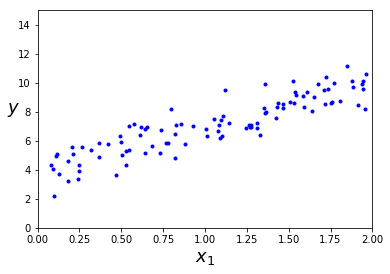

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize = 18)
plt.ylabel("$y$", rotation = 0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [4]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[3.92059589]
 [3.05030368]]


X_b의 형태는 첫 번째 column이 1로 되어 있고, 두 번째 column은 X의 element로 구성된다.
여기서는 Matrix X_b의 크기는 100*2 이다.
```python
[[1.         1.46398788]
 [1.         1.19731697]
 [1.         0.31203728]
 [1.         0.31198904]
 [1.         0.11616722]
 [1.         1.73235229]
 [1.         1.20223002]...]
```
- theta_best의 수식은 정규방정식입니다.
- theta_best의 수식에서 X_b.T.dot(X_b)의 Matrix 크기는 (2*100) dot(내적) (100*2) 연산은 (2*2)가 된다. 
- 이에 대해서 np.linalg.inv() 역행렬을 계산합니다.
- np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T)의 Matrix 크기는 (2*100)
- np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)의 Matrix 크기는 (2*100) dot (100*1)로 (2*1)이 됩니다.


In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
print(y_predict)

[[ 3.92059589]
 [10.02120325]]


이제 theta_best를 이용해 y를 예측해봅니다.

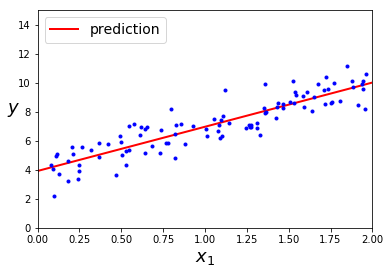

In [6]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="prediction")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize = 18)
plt.ylabel("$y$", rotation = 0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

위의 선형 회귀 모델을 이용해 예측을 그래프로 그려봅니다.

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

scikit 라이브러리의 LinearRegression 모델을 사용합니다.
fit method를 이용해 모델을 학습합니다.

In [9]:
print(lin_reg.intercept_)
print(lin_reg.coef_)

[3.92059589]
[[3.05030368]]


학습된 모델의 coefficients(weight 또는 기울기)와 x=0일 때의 intercept를 가져옵니다.

In [10]:
print(lin_reg.predict(X_new))

[[ 3.92059589]
 [10.02120325]]


In [11]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

np.linalg.lstsq는 ax=b를 계산합니다. b-ax의 2-norm이 최소화되는 vector x를 계산합니다.

In [12]:
print(theta_best_svd)

[[3.92059589]
 [3.05030368]]


In [13]:
print(np.linalg.pinv(X_b).dot(y))

[[3.92059589]
 [3.05030368]]


np.linalg.pinv를 통해 pseudo-inverse matrix를 계산할 수 있습니다.
이는 SVD(Singular-Value-Decomposition) 알고리즘을 사용해 역행렬 계산하는 일반적인 방법입니다.

### 경사 하강법을 사용한 선형회귀 접근

In [14]:
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

eta는 여기서 학습률이며, theta를 random값으로 초기화하여 iteration 수만큼 gradients를 계산하여 theta를 업데이트 합니다.
- gradients 계산 수식은 MSE(Mean Square Error)를 계산하는 수식에 미분을 취한 값입니다.

In [15]:
print(theta)

[[3.92059589]
 [3.05030368]]


In [16]:
print(X_new_b.dot(theta))

[[ 3.92059589]
 [10.02120325]]


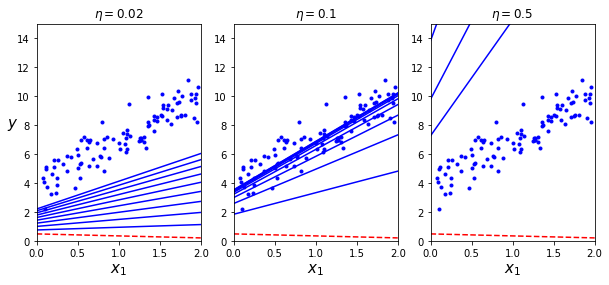

In [17]:
theta_path_bgd = []
def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradient = 2/m * X_b.T.dot(X_b.dot(theta) - y)      
        theta = theta - eta * gradient
        if theta_path is not None:
            theta_path.append(theta)
            
        plt.xlabel("$x_1$", fontsize=15)
        plt.axis([0, 2, 0, 15])
        plt.title(r"$\eta = {}$".format(eta), fontsize=12)
np.random.seed(42)
theta = np.random.randn(2, 1)

plt.figure(figsize=(10, 4))

plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=15)

plt.subplot(132)
plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)

plt.subplot(133)
plot_gradient_descent(theta, eta=0.5)
plt.show()

eta(학습률)의 값을 다양히 주면서 모델이 예측하는 결과를 그래프로 확인합니다
 - 학습률이 낮으면 최저점에 도달하기 위해 시간이 오래걸립니다.
 - 학습률이 높으면 최저점에 멀어져 답을 못찾습니다.
 - 적절한 학습률(learning rate)을 찾아야 합니다.

### Stochastic Gradient Descent을 사용한 Linear Regression

In [18]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)
n_epochs = 50
t0, t1 = 5, 50

- n_epochs : SGD에서는 epoch을 통해 반복됩니다.
- m : 각 epoch은 training set 만큼 반복됩니다. 
- t0, t1 : learning rate를 결정하는 learning schedule의 parameter

In [19]:
def learning_schedule(t):
    return t0 / (t + t1)

In [20]:
theta = np.random.randn(2, 1)

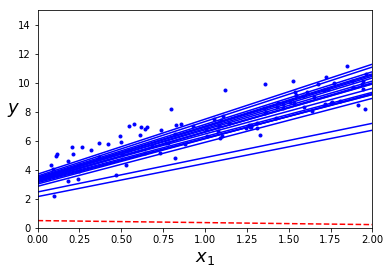

In [21]:
for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

그림은 첫 epoch의 20개의 step을 보여줍니다. m을 통해 random_index를 결정하기 때문에 random으로 선택되어 학습합니다.

In [22]:
print(theta)

[[3.90391523]
 [3.02558135]]


In [23]:
from sklearn.linear_model import SGDRegressor

In [24]:
sgd_reg = SGDRegressor(max_iter = 50, penalty = None, eta0 = 0.1, random_state = 42)

이번에는 scikit 라이브러리의 SGDRegreesor를 사용합니다.

In [25]:
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=50, n_iter=None, penalty=None,
       power_t=0.25, random_state=42, shuffle=True, tol=None, verbose=0,
       warm_start=False)

fit method를 이용해 training 합니다.

In [26]:
print(sgd_reg.intercept_)
print(sgd_reg.coef_)

[3.91999232]
[3.05189761]


LinearRegression과 마찬가지로 coefficient(기울기)와 intercept(절편)을 가져올 수 있습니다.

### Mini-batch Gradient Descent

In [27]:
theta_path_mgd = []
n_iterations = 50
minibatch_size = 20
np.random.seed(42)
theta = np.random.randn(2, 1)
t0, t1 = 200, 1000
t = 0

mini-batch 사이즈만큼 gradient를 계산하여 theta를 업데이트 합니다.

In [28]:
def learning_schedule(t):
    return t0 / (t + t1)

In [29]:
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i : i+minibatch_size]
        yi = y_shuffled[i : i+minibatch_size]
        gradients = 2 / minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [30]:
print(theta)

[[3.85262035]
 [2.94102214]]


In [31]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

In [32]:
print(theta_path_bgd)

[[[1.85008224]
  [1.48690504]]

 [[2.59200468]
  [2.36588895]]

 [[3.00123375]
  [2.83920827]]

 ...

 [[3.92059589]
  [3.05030368]]

 [[3.92059589]
  [3.05030368]]

 [[3.92059589]
  [3.05030368]]]


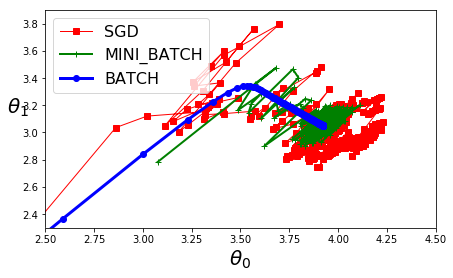

In [33]:
plt.figure(figsize=(7, 4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="SGD")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="MINI_BATCH")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="BATCH")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

SGD와 Mini-batch 그리고 Batch에 따른 theta의 수렴을 보여주고 있습니다.